In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# CSVファイルを読み込む
df = pd.read_csv("/home/eiji/project/g/data/TON_iot/Processed_IoT_dataset/IoT_Fridge.csv")

# temp_conditionの文字列をトリム（前後の空白削除）
df['temp_condition'] = df['temp_condition'].str.strip()

# 一意の値をチェック
print(df['temp_condition'].unique())



df.head()
# df_combined = pd.concat([df, encoded_df], axis=1)

['high' 'low']


,date,time,fridge_temperature,temp_condition,label,type
0,31-Mar-19,12:36:52,13.10,high,0,normal
1,31-Mar-19,12:36:53,8.65,high,0,normal
2,31-Mar-19,12:36:54,2.00,low,0,normal
3,31-Mar-19,12:36:55,4.80,low,0,normal
4,31-Mar-19,12:36:56,10.70,high,0,normal


In [2]:
# 'time'列の余分な空白を削除
df['time'] = df['time'].str.strip()

In [3]:
# 'time'列をdatetime型の時間オブジェクトに変換する
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# 時間、分、秒をそれぞれ新しい列として追加
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [4]:
df

,date,time,fridge_temperature,temp_condition,label,type,hour,minute,second
0,31-Mar-19,1900-01-01 12:36:52,13.10,high,0,normal,12,36,52
1,31-Mar-19,1900-01-01 12:36:53,8.65,high,0,normal,12,36,53
2,31-Mar-19,1900-01-01 12:36:54,2.00,low,0,normal,12,36,54
3,31-Mar-19,1900-01-01 12:36:55,4.80,low,0,normal,12,36,55
4,31-Mar-19,1900-01-01 12:36:56,10.70,high,0,normal,12,36,56
...,...,...,...,...,...,...,...,...,...
587071,27-Apr-19,1900-01-01 12:41:17,4.00,low,0,normal,12,41,17
587072,27-Apr-19,1900-01-01 12:41:17,6.05,high,0,normal,12,41,17
587073,27-Apr-19,1900-01-01 12:41:17,12.80,high,0,normal,12,41,17
587074,27-Apr-19,1900-01-01 12:41:18,6.50,high,0,normal,12,41,18


In [5]:
import numpy as np

# 時間と分をサイクリック特徴量として変換
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

# 新しい特徴量を確認
print(df[['hour', 'hour_sin', 'hour_cos', 'minute', 'minute_sin', 'minute_cos']].head())


   hour      hour_sin  hour_cos  minute  minute_sin  minute_cos
0    12  1.224647e-16      -1.0      36   -0.587785   -0.809017
1    12  1.224647e-16      -1.0      36   -0.587785   -0.809017
2    12  1.224647e-16      -1.0      36   -0.587785   -0.809017
3    12  1.224647e-16      -1.0      36   -0.587785   -0.809017
4    12  1.224647e-16      -1.0      36   -0.587785   -0.809017


In [6]:
df

,date,time,fridge_temperature,temp_condition,label,type,hour,minute,second,hour_sin,hour_cos,minute_sin,minute_cos
0,31-Mar-19,1900-01-01 12:36:52,13.10,high,0,normal,12,36,52,1.224647e-16,-1.0,-0.587785,-0.809017
1,31-Mar-19,1900-01-01 12:36:53,8.65,high,0,normal,12,36,53,1.224647e-16,-1.0,-0.587785,-0.809017
2,31-Mar-19,1900-01-01 12:36:54,2.00,low,0,normal,12,36,54,1.224647e-16,-1.0,-0.587785,-0.809017
3,31-Mar-19,1900-01-01 12:36:55,4.80,low,0,normal,12,36,55,1.224647e-16,-1.0,-0.587785,-0.809017
4,31-Mar-19,1900-01-01 12:36:56,10.70,high,0,normal,12,36,56,1.224647e-16,-1.0,-0.587785,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587071,27-Apr-19,1900-01-01 12:41:17,4.00,low,0,normal,12,41,17,1.224647e-16,-1.0,-0.913545,-0.406737
587072,27-Apr-19,1900-01-01 12:41:17,6.05,high,0,normal,12,41,17,1.224647e-16,-1.0,-0.913545,-0.406737
587073,27-Apr-19,1900-01-01 12:41:17,12.80,high,0,normal,12,41,17,1.224647e-16,-1.0,-0.913545,-0.406737
587074,27-Apr-19,1900-01-01 12:41:18,6.50,high,0,normal,12,41,18,1.224647e-16,-1.0,-0.913545,-0.406737


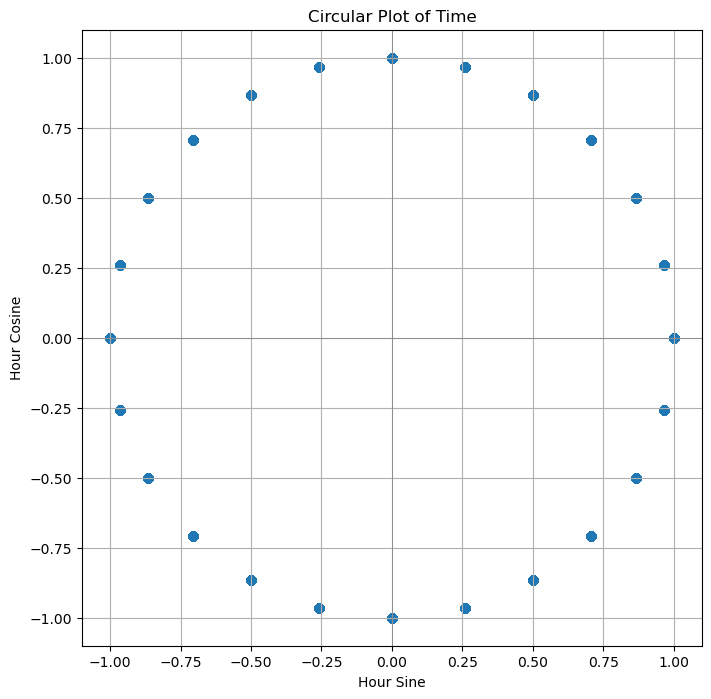

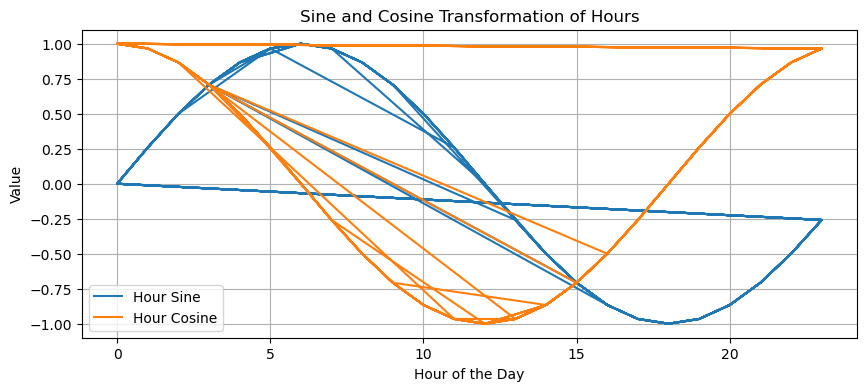

In [9]:
import matplotlib.pyplot as plt

# 時間に対するサイクリック特徴量のプロット
plt.figure(figsize=(8, 8))
plt.scatter(df['hour_sin'], df['hour_cos'])
plt.xlabel('Hour Sine')
plt.ylabel('Hour Cosine')
plt.title('Circular Plot of Time')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

# 時間の推移に沿ったサイクリック特徴量のプロット
plt.figure(figsize=(10, 4))
plt.plot(df['hour'], df['hour_sin'], label='Hour Sine')
plt.plot(df['hour'], df['hour_cos'], label='Hour Cosine')
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.title('Sine and Cosine Transformation of Hours')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df['time'] = df['time'].str.strip()

In [ ]:
df['time']  = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

In [ ]:
df['hour'] = df['time'].apply(lambda x: x.hour)
df['minute'] = df['time'].apply(lambda x: x.minute)
df['second'] = df['time'].apply(lambda x: x.second)

In [ ]:
import numpy as np

# 時間と分をサイクリック特徴量として変換
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

# 新しい特徴量を確認
print(df[['hour', 'hour_sin', 'hour_cos', 'minute', 'minute_sin', 'minute_cos']].head())


In [ ]:
df = df.drop(columns=['date', 'time', 'temp_condition', 'type'])

In [ ]:
new_order = ['hour', 'minute', 'second', 'fridge_temperature', "temp_condition_encoded", 'label']

In [ ]:
df = df[new_order]

In [ ]:
df

In [ ]:
df.to_csv('./preprocessed_data/LE_TON-iot.csv', index=False)